In [52]:
# import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [53]:
# Load and show the data set
data = pd.read_csv('/content/car_age_price.csv')
data.head()

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000


In [54]:
data.shape

(112, 2)

In [55]:
# get the information of data set
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Year    112 non-null    int64
 1   Price   112 non-null    int64
dtypes: int64(2)
memory usage: 1.9 KB


In [56]:
# from info no null value present
# describe the data set
data.describe()

,Year,Price
count,112.000000,112.000000
mean,2016.669643,483866.044643
std,1.629616,91217.450533
min,2013.000000,300000.000000
25%,2015.000000,423750.000000
50%,2017.000000,500000.000000
75%,2017.000000,550000.000000
max,2020.000000,755000.000000


In [57]:
# check whether any incorrect data like '?' included
data['Year'].unique()


array([2018, 2019, 2015, 2016, 2017, 2020, 2013, 2014])

In [58]:
# check whether any incorrect data like '?' included
data['Price'].unique()

array([465000, 755000, 700000, 350000, 425000, 575000, 509999, 500000,
       600000, 475000, 550000, 434999, 650000, 450000, 486000, 545000,
       525000, 396000, 325000, 345000, 341000, 490000, 540000, 595000,
       495000, 400000, 300000, 320000, 409999, 390000, 480000, 520000,
       640000, 375000, 420000])

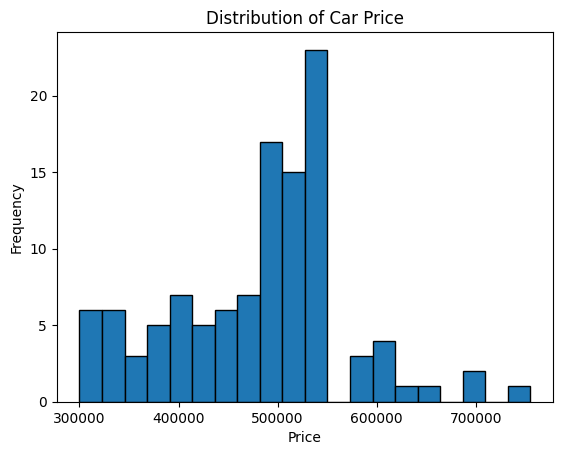

In [59]:
# Plot Histogram to know the distribution
plt.hist(data['Price'], bins=20, edgecolor='black')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of Car Price')
plt.show()

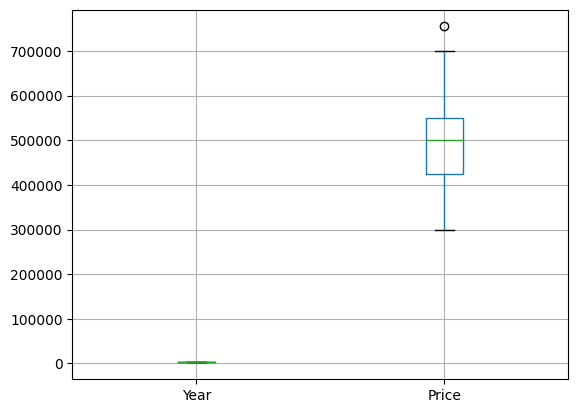

In [60]:
# create box plot to check outliers
data.boxplot()
plt.show()

**Encoding and scaling are unnecessary. Additionally, the outlier depicted in the box plot is not taken into account for this particular data set.**

In [61]:
# Define dependent variable and independent variable
X = data[['Year']]
y = data['Price']

In [62]:
# import library to split and train the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **LINEAR REGRESSION**

In [63]:
# import and train the linear regression model
from sklearn import linear_model
lr = linear_model.LinearRegression()

In [64]:
model = lr.fit(X_train,y_train)

In [65]:
# Predict on the test set
y_pred_linear = model.predict(X_test)

In [66]:
from sklearn.metrics import mean_absolute_error, r2_score
# Evaluate the linear regression model
mae_linear = mean_absolute_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

mae_linear, r2_linear

(53534.77957001264, 0.36759313425902185)

# **LASSO REGRESSION**

In [67]:
# import and train the lasso regression model
from sklearn.linear_model import Lasso
lo = Lasso()

In [68]:
laso_model = lo.fit(X_train, y_train)

In [69]:
# Predict on the test set
y_pred_laso = laso_model.predict(X_test)

In [70]:
# Evaluate the lasso regression model
mae_laso = mean_absolute_error(y_test, y_pred_laso)
r2_laso = r2_score(y_test, y_pred_laso)

mae_laso, r2_laso

(53534.33030898286, 0.3675999284778446)

# **CHECKING WHICH MODEL IS BETTER**

In [71]:
# Determine the better model
if mae_linear < mae_laso:
  print("Linear Regression performs better with a lower MAE.")
elif mae_laso < mae_linear:
  print("Lasso Regression performs better with a lower MAE.")
else:
  print("Both models have the same MAE.")

if r2_linear > r2_laso:
  print("Linear Regression performs better with a higher R-squared.")
elif r2_laso > r2_linear:
  print("Lasso Regression performs better with a higher R-squared.")
else:
  print("Both models have the same R-squared.")

Lasso Regression performs better with a lower MAE.
Lasso Regression performs better with a higher R-squared.


# Predict price using better model (Lasso) of a 2022 model second-hand grand i10

In [72]:
# Create a DataFrame for the year 2022 with the same feature names
year_2022 = pd.DataFrame({'Year': [2022]})

# Predict using the Lasso Regression model
predicted_price_lasso = laso_model.predict(year_2022)
print("Predicted price for 2022 model (Lasso Regression):", predicted_price_lasso)

Predicted price for 2022 model (Lasso Regression): [743599.37427144]
